In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names_by_year = {}
for year in range(1900, 2001):
    names_by_year[year] = pd.read_csv(
        'C:\Learn\PycharmProjects\domashnee\Work_with_Pandas\\names\yob{}.txt'.format(year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])

In [3]:
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()

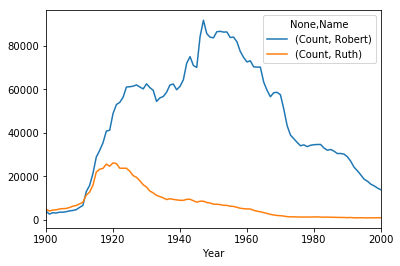

In [4]:
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()

In [5]:
names_by_year = {}
for year in range(1900, 2001, 5):
    names_by_year[year] = pd.read_csv(
        'C:\Learn\PycharmProjects\domashnee\Work_with_Pandas\\names\yob{}.txt'.format(year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])

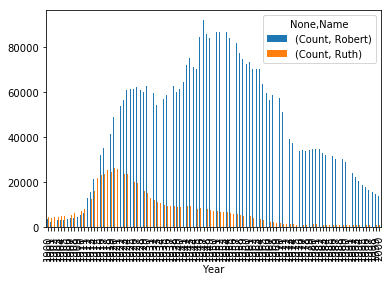

In [6]:
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar()

In [7]:
names_by_1950 = pd.read_csv(
        'C:\Learn\PycharmProjects\domashnee\Work_with_Pandas\\names\yob1950.txt',
        names=['Name','Gender','Count']
    )
names_R_for_pie = names_by_1950[(names_by_1950.Name.str.startswith("R"))].sort_values(by='Count', ascending=False).head(10)
names_R_for_pie

,Name,Gender,Count
6114,Robert,M,83575
6119,Richard,M,51014
6124,Ronald,M,29917
6139,Roger,M,12551
6143,Raymond,M,11180
35,Rebecca,F,9426
48,Ruth,F,7128
6163,Roy,M,6459
55,Rita,F,6425
6164,Ralph,M,6406


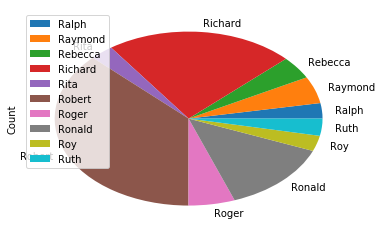

In [8]:
names_R_for_pie.groupby('Name').sum().plot.pie(y='Count')

In [9]:
names_by_year = {}
for year in range(1900, 2001, 10):
    names_by_year[year] = pd.read_csv(
        'C:\Learn\PycharmProjects\domashnee\Work_with_Pandas\\names\yob{}.txt'.format(year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
names_all_years = names_all.groupby('Name', as_index=False).sum().sort_values(by='Count', ascending=False)#.head(10)#.to_dict()
names = list(names_all_years['Name'].to_dict().values())
# print(names[1])

In [10]:
def count(word):
    consonants = 0
    for letter in word:
        if letter.isalpha():
            if letter.lower() in 'aeiouy':
                continue
            else:
                consonants += 1
    return (consonants)

In [11]:
cons = []
for i in range (len(list(names_all_years['Name'].to_dict().values()))):
    cons.append(count(names[i]))

In [12]:
names_all_years['Cons'] = names_all_years.apply(lambda row: count(row.Name), axis=1) 
names_all_years

,Name,Count,Cons
18171,James,497624,3
20120,John,486007,3
35084,Robert,473570,4
29693,Michael,424835,4
28678,Mary,394873,2
43993,William,381310,4
9952,David,354730,3
34892,Richard,249925,5
20497,Joseph,241395,4
7217,Charles,227644,5


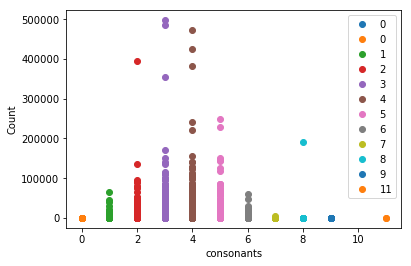

In [13]:
def count_consonants(group):
    plt.plot(group['Cons'], group['Count'], 'o', label=group.name)
    
names_all_years.groupby('Cons').apply(count_consonants)
plt.xlabel('consonants')
plt.ylabel('Count')
plt.legend()